# FINAL REPORT #


### Introduction ###

The "HR Analytics" dataset is centered around HR-related information within an organization, encompassing various demographic, job-related, and satisfaction-related variables for employees. The dataset consists of 1470 rows, each representing observations for individual employees. There are 35 numeric/categorical variables that provide information about different charactersistics of the employee. The full dataset can be found here: https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction/.

The 35 variables are as follows:
- Age: Continuous, Age of the employee
- Attrition: Categorical, Whether or not the employee is leaving the company
- BusinessTravel: Categorical, How frequently employee travels for business purpose
- DailyRate: Continuous, Daily wage of an employee
- Department: Categorical, Employee's department
- DistanceFromHome: Continuous, Distance from the employee's home to office in km
- Education: Continuous, Qualification
- EducationField: Categorical, Stream of education
- EmployeeCount: Undefined (every entry is a 1)
- EmployeeNumber: Continuous, Employee ID
- EnvironmentSatisfaction: Continuous, Employee's satisfaction with the work environment
- Gender: Categorical, Employee's gender
- HourlyRate: Continous, Hourly salary
- JobInvolvement: Continuous, Job involvement
- JobLevel: Continuous, Level of job
- JobRole: Categorical, Job role
- JobSatisfaction: Continous, Satisfaction with the job
- MaritalStatus: Categorical, Marital status
- MonthlyIncome: Continous, Monthly salary
- MonthlyRate: Continuous, Monthly rate
- NumCompaniesWorked: Continuous, Number of companies worked at
- Over18: Categorical, Over the age of 18
- OverTime: Categorical, Whether or not employee works overtime
- PercentSalaryHike: Continuous, Percentage increase in salary
- PerformanceRating: Continuous, Performance rating
- RelationshipSatisfaction: Continuous, Relations satisfaction between employee and coworkers/employer
- StandardHours: Undefined (every entry is 80)
- StockOptionLevel: Continuous, Stock options
- TotalWorkingYears: Continuous, Total years worked
- TrainingTimesLastYear: Continuous, Hours spent training
- WorkLifeBalance: Continuous, Time spent between work and outside
- YearsAtCompany: Continuous, Total number of years at the company
- YearsInCurrentRole: Continuous, Years in current role
- YearsSinceLastPromotion: Continuous, Years since last promotion
- YearsWithCurrManager: Continuous, Years with current manager

#### Question of Interest #### 
Do gender and the distance and employee works from home have an effect on attrition, and are the effects of distance from home on attrition different for women compared to men?

#### Motivation ####

Employee attrition has long been a concerns of many companies. The departure of a good employee can affect a company in many ways, which can lead to decreased performance, increased costs, and challenges in recruiting and training new employees (Racherla, 2020). If the reasons for employee attrition can be identified, it can help the company to take steps in the future to avoid, as much as possible, a large number of employees leaving the company. <br>
We have read several literature on this topic, and Dino Michael Quinteros's paper *Predictive Modelling of Employee Attrition Using Deep Learning* mentions that the distance between home and workplace and work satisfaction have a correlation (2023). Therefore, our group chose to explore the correlation between distance between home and workplace and employee attrition. We also found that the existing literature lacks exploration of gender and employee attrition. Hence we added a second factor and will investigate potential variations in this correlation across different genders.

## EXPLORATORY DATA ANALYSIS
We begin by conducting an exploratory data analysis. For the purpose of answering our research question, we will focus on only the following variables:

`Attrition`: (Response Variable: Yes/No) Whether the employee dropped out of the workforce or not

`DistanceFromHome`: The distance at which the employee lives from their workplace.

`Gender`: Gender of the employee (Male or Female)

#### Exploratory Visualizations: ####
First, we install the necessary libraries and read in the data from the web.

In [1]:
# Install the necessary libraries
library(tidyverse)
library(tidymodels)
library(infer)
library(GGally)
library(car)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Read the data from the web
mydata = read.csv("https://raw.githubusercontent.com/jessica2923/STAT301/main/HR-Employee-Attrition.csv")
head(mydata)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<chr>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


To explore the data, we will first use a boxplot to see if we can gain any insight as to whether or not the distance an employee works from home has an effect on attrition. Additionally, we can separate the plot by gender to see if there is a difference between male and female employees.

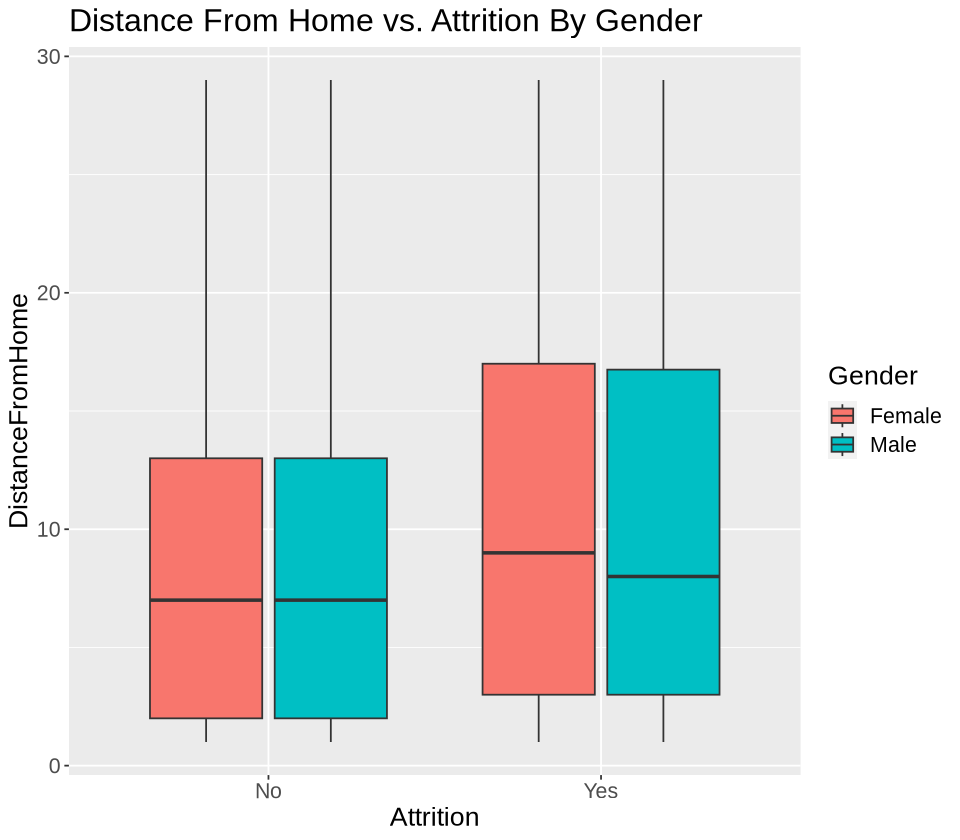

In [3]:
# Create boxplot of Distance From Home vs. Attrition By Gender
options(repr.plot.width = 8, repr.plot.height = 7)

hr_boxplot <- ggplot(mydata, aes(x=Attrition, y=DistanceFromHome, fill=Gender)) + 
    geom_boxplot() +
    theme(text = element_text(size = 16)) +
    ggtitle("Distance From Home vs. Attrition By Gender")
hr_boxplot

Based on the plot, we see that employees that work further from home seem to be more likely to depart from the organization. For each case of attrition (yes/no), the median distance that the employee's home is from work is very similar for males and females. Additionally, for each case of attrition, the interquartile range of distances from the employee's home to work is similar for males and females. This suggests that gender does not have an effect on attrition, but we will need to conduct further analysis on this relationship. We can explore the data further by closely examining the number of employees who work a certain distance from home.

`summarise()` has grouped output by 'Attrition', 'Gender'. You can override
using the `.groups` argument.


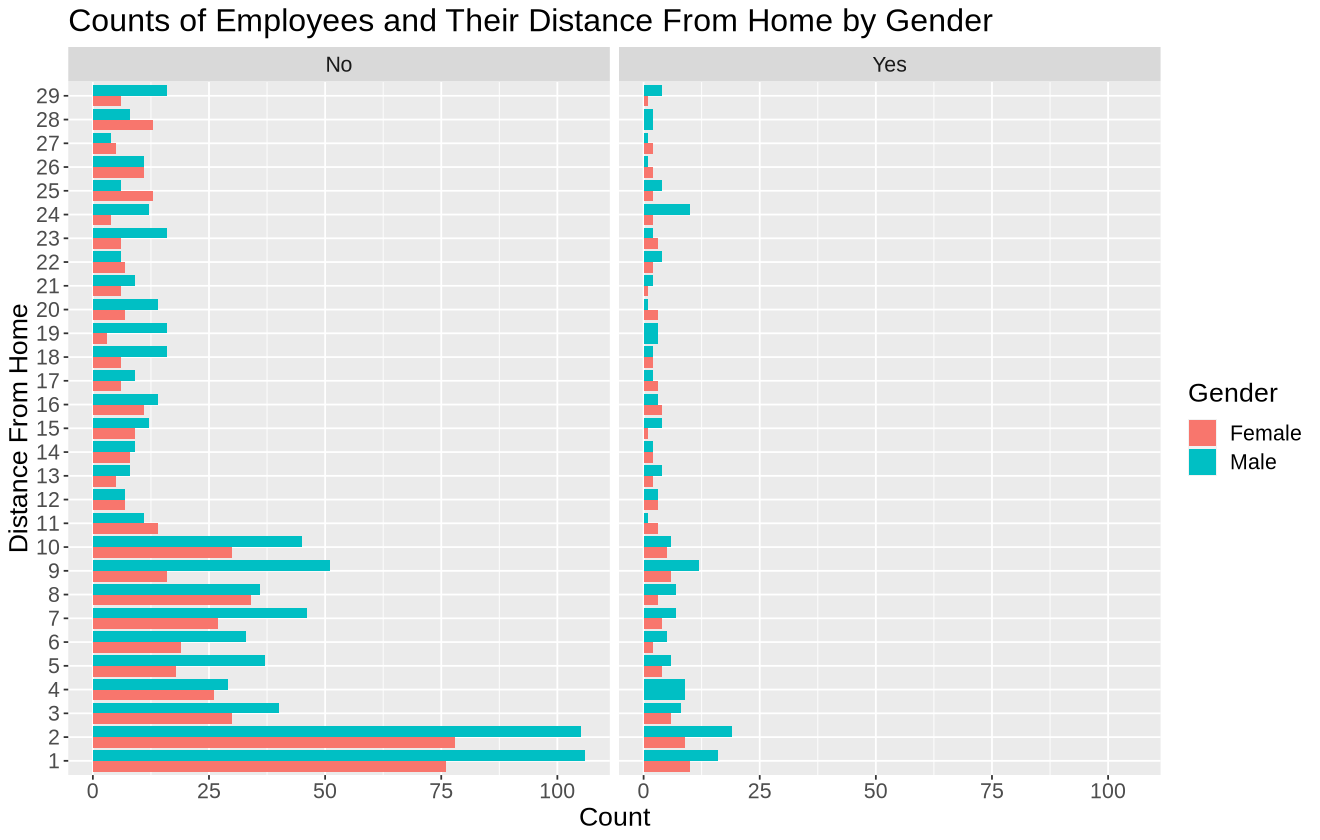

In [4]:
# Obtain counts of employees and their distances from home
options(repr.plot.width = 11, repr.plot.height = 7)

attrition_summary <- mydata %>% 
    group_by(Attrition, Gender, DistanceFromHome) %>%
    summarise(count = n())

# Plot the counts of employees and their distances from home separated by gender
counts_plot <- attrition_summary %>% 
    ggplot(aes(x = as.factor(DistanceFromHome), y = count, fill = Gender)) + 
    geom_bar(stat = "identity", position = "dodge") + 
    facet_wrap(~Attrition) + 
    labs(x = "Distance From Home", y = "Count", fill = "Gender") + 
    coord_flip() +
    ggtitle("Counts of Employees and Their Distance From Home by Gender") +
    theme(text = element_text(size = 16))
counts_plot

This plot illustrates the relationship between distance from home and attrition, while also considering gender. The graph indicates that male employees predominantly leave the company; notably, at a distance of 4 miles from home, it's exclusively men who have left.

However, one potential issue is the similarity in proportions between the genders. The proportion of men staying or leaving is higher than that of women, suggesting that gender might not significantly impact the relationship between attrition and distance from home.

Furthermore, there could be additional variables influencing attrition outcomes. For instance, an employee's hourly rate or marital status might affect their residential choices, thereby influencing their commuting distance. These factors need to be considered to fully understand the dynamics between distance from home, gender, and employee retention.

# METHOD: Plan
A potential way to perform the above analysis is to use a logistic regression model which is appropriate for predicting binary outcomes, such as attrition (Yes/No), which is the response variable in our analysis. Logistic regression models the probability of the response variable being in a particular category (`Attrition`: Yes/No) as a function of the explanatory variables (`DistanceFromHome`, `Gender`).

## Method: Logistic Regression Analysis

### Model Equation:
The logistic regression model equation for predicting the probability $P(Y=1)$ of the binary outcome Y (e.g., attrition) given predictor variables ($X_1$, $X_2$, ..., $X_k$) is given by:

$P(Y=1)$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_kX_k)}}$

Where:

- $(\beta_0, \beta_1, ..., \beta_k)$ are the coefficients representing the effects of the predictor variables on the log-odds of the outcome.
- *e* is the base of the natural logarithm.

The model equation to answer my question shall look like the following:
$log(Y_i) = \beta_0 + \beta_1X_{1i} + \beta_2X_{2i} + \beta_3X_{1i}X_{2i} + e_i$

- *i* is the index for employee *i*
- $Y_i$ takes the value 1 if the employee ceased employment and 0 otherwise.
- $X_{1i}$ is the distance from home for employee *i*
- $X_{2i}$ is the gender of employee *i*: Male or Female (baseline:female)


#### Interpretation of Coefficients:

- $\beta_0$: This represents the log-odds of attrition when the distance from home is 0 and the employee is female.
- $\beta_1$: This coefficient represents the change in the log-odds of attrition for a one-unit increase in the distance from home for females.
- $\beta_2$: This coefficient represents the difference in the log-odds of attrition between male and female employees, when the distance from home is zero.
- $\beta_3$: This coefficient represents the interaction effect between distance from home and gender. It indicates how the relationship between distance from home and attrition changes depending on the gender of the employee.
###
- **Why Logistic Regression?**
    - Logistic regression is a statistical method specifically designed for binary classification tasks, making it suitable for predicting attrition cases (Yes/No).
    - It allows us to model the relationship between a binary outcome variable (attrition) and one or more predictor variables, such as distance from home and gender.
###
- **Applicability to Our Question:**
    - Logistic regression enables us to assess the influence of distance from home and gender on the likelihood of attrition.
    - We can interpret the coefficients to understand the direction and strength of these relationships.
###
- **Assumptions:**
    - **Independence of Observations:** The observations in the dataset should be independent of each other.
    - **Linearity of Log Odds:** The relationship between predictor variables and the log odds of the outcome variable should be linear.
    - **Homoscedasticity** where the residuals variance is constant across the independent variables. 
    - **Normality of error** where the residuals must have a normal distribution. 
    - **No perfect multicollinearity** where there's no strong correlation between the two independent variables.
###
- **Limitations:**
    - **Linearity Assumption:** The relationship between predictors and the log odds may not always be linear in real-world data.
    - **Risk of Overfitting:** If the number of predictors is large relative to the sample size, overfitting may occur, leading to poor generalisation. This is the main reason why I have only chosen to work with two predictors instead of all of them.

# IMPLEMENTATION OF THE PROPOSED MODEL

To implement our proposed method, we will construct a response variable for `Attrition` where 1 corresponds to "Yes" and 0 corresponds to "No", and use `glm()` to estimate a binary logistic regression. Then we'll use `tidy()` to obtain a summary table of results.

In [5]:
# Construct response variable
mydata <- 
    mydata %>% 
    mutate(Attrition = ifelse(Attrition == "Yes", 1, 0))

# Estimate a binary logistic regression
my_binary_log_model <- 
  glm(
       formula = Attrition ~ DistanceFromHome * Gender,
       data = mydata,
       family = "binomial")

# Obtain summary of results
tidy(my_binary_log_model) %>%  
    mutate(exp.estimate = exp(estimate)) %>% 
    mutate_if(is.numeric, round, 3)

term,estimate,std.error,statistic,p.value,exp.estimate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-2.025,0.183,-11.085,0.000,0.132
DistanceFromHome,0.028,0.013,2.086,0.037,1.028
GenderMale,0.219,0.231,0.948,0.343,1.244
DistanceFromHome:GenderMale,-0.005,0.017,-0.286,0.775,0.995


### Interpretation of Coefficients ###

For the sake of interpretability, we will look at the coefficent estimates under the column "exp.estimate"

- The odds of attrition are 2.8% higher for every unit increase in an employee's distance from home to the workplace. These results are significant at the 5% level. Hence, there is sufficient evidence to believe that distance from home and attrition are positively correlated.
- The odds of attrition are 24.4% higher for men as compared to women. However, the p-value for this coefficient is 0.343 which makes the result statistically insignificant and therefore we do not have sufficient evidence to believe that odds of attrition are associated with gender.
- For the interaction term, the coefficient points towards a -5% differential effect of gender on our outcome. As before, the p-value (0.775) is extremely large which means that we do not have reason to believe that this coefficient is any different from 0. We can conclude that there is no evidence of a differential effect of gender on the relationship between distance from home and the odds of attrition.

### Model Diagnosis ###

#### CHECK FOR MULTI-COLLINEARITY: ####

In [6]:
vif(my_binary_log_model)

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



DistanceFromHome                  Gender DistanceFromHome:Gender 
               2.560394                2.454643                3.945416

A VIF amount that exceeds 5 or 10 indicated a problem vis-a-vis multicollinearity. However all VIF values obtained above are significantly smaller than that threshold and therefore present no issues.

#### CHECK FOR INDEPENDENCE ####

Statistical and visual tests of independence are usually insufficient. Instead, we will try to reason through a series of questions about the dataset:

- The data seems to consist of all employees of the firm and therefore should not have any sampling bias.
- It does not seem that any individuals are repeated in the dataset.
- It does not seem possible that any observations are related temporally.
- It does not seem possible that any observations are related spatially.
- It does not seem possible that any observations are related by other non-understood means. 

#### CHECK FOR LINEARITY OF LOG-ODDS ####

- In logistic regression, we assume the relationship is linear on the logit scale. This is assessed with component-plus-residual plots. The “component” is the values of a variable multiplied by its estimated coefficient (meaning that each predictor has its own component vector), and the “residual” is the working residuals, a type of residuals in generalized linear models. 
- However, this is out of scope for this class so we will not be doing it here. But it is good practice to check linearity of log-odds using this method.

# DISCUSSION #
Based on the significance of our estimated coefficients, there is evidence that suggests that the distance that an employee's home is away from the workplace has an effect on attrition. In particular, for every unit increase in an employee's distance from home to the workplace, we expect the odds of attrition to increase by 2.8%. Additionally, we do not have enough evidence that odds of attrition are associated with gender or that there is a differential effect of gender on the relationship between distance from home and the odds of attrition. These results are not what we expected to find, as we initially thought that gender would have an effect on the odds of attrition or a relationship to `DistanceFromHome` that affects the odds of attrition.

This model could be improved by removing `Gender` and the interaction term, and considering other variables in the dataset that may have an influence on the odds of attrition. However, this would move the analysis away from our initial research question and instead focus on answering questions such as: What factor(s) affect the odds of attrition the most?


## REFERENCES ##
- https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction/
- Quinteros, D. M. (2023). Predictive Modelling of Employee Attrition Using Deep Learning. Acadlore Trans. Mach. Learn., 2(4), 212-225. https://doi.org/10.56578/ataiml020404
- Racherla, S. (2020). Predicting Employee Attrition: the Impact of Hybrid Work. Journal of Artificial Intelligence and Machine Learning in Management, 4(1), 14–26. https://journals.sagescience.org/index.php/jamm/article/view/39